<a href="https://colab.research.google.com/github/pravallika89ch/alignn/blob/main/alignn_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [ ]:
import os
os.environ["MPLBACKEND"] = "Agg"


In [72]:
!pip install pymatgen


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.0 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=fab11768851197159123f2b4dafbfef72ded057534797a77ae18eb861214e20a
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8aadbbb17dc05f256756d8fd915
Successfully built bibtexparser


In [76]:
from jarvis.core.atoms import Atoms


In [ ]:
!conda install -y numpy=1.23.5 pandas=1.5.3 python=3.10
!pip install jarvis-tools alignn torchdata dgl==1.1.1



Channels:
 - conda-forge
Platform: linux-64

CondaError: KeyboardInterrupt



In [ ]:
import pandas as pd
import json
import os
from jarvis.core.atoms import Atoms

# Set your folder paths
csv_path = "/content/drive/MyDrive/Internship/tmdc-co2-meoh/dataset/opentmdc/co2.vaspfiles/id_prop.csv"
vasp_folder = "/content/drive/MyDrive/Internship/tmdc-co2-meoh/dataset/opentmdc/co2.vaspfiles"
output_json = "co2_dataset.json"

# Load CSV
df = pd.read_csv(csv_path)

# Prepare dataset list
dataset = []
for i, row in df.iterrows():
    vasp_file = os.path.join(vasp_folder, row['id'])
    atoms = Atoms.from_poscar(vasp_file)
    dataset.append({
        "structure": atoms.to_dict(),
        "target": float(row['adsorption_energy (eV)']),
        "jid": row['id']
    })

# Save JSON
with open(output_json, "w") as f:
    json.dump(dataset, f, indent=2)

print("Dataset JSON created:", output_json)

Dataset JSON created: co2_dataset.json


In [ ]:
import json

# Load the original file
with open("co2_dataset.json", "r") as f:
    data = json.load(f)

# Fix structure ➝ atoms
for entry in data:
    entry["atoms"] = entry.pop("structure")

# Save it back
with open("co2_dataset_fixed.json", "w") as f:
    json.dump(data, f, indent=2)

print("Fixed file written as co2_dataset_fixed.json")

Fixed file written as co2_dataset_fixed.json


In [ ]:
import json, random

with open("co2_dataset_fixed.json") as f:
    data = json.load(f)

# Shuffle for randomness
random.shuffle(data)

# Split
train, val, test = data[:30], data[30:33], data[33:36]

# Save
with open("train.json", "w") as f: json.dump(train, f, indent=2)
with open("val.json", "w") as f: json.dump(val, f, indent=2)
with open("test.json", "w") as f: json.dump(test, f, indent=2)

print("✅ train/val/test JSON files created.")

✅ train/val/test JSON files created.


In [ ]:
import json

with open("train.json", "r") as f:
    train_data = json.load(f)

print(f"✅ Total training samples: {len(train_data)}")


✅ Total training samples: 30


In [52]:
config = {
    "version": "1.0",
    "filename": "co2_dataset_fixed.json",
    "dataset": "user_data",
    "use_lmdb": False,
    "target": "target",
    "id_tag": "jid",
    "atom_features": "cgcnn",
    "neighbor_strategy": "k-nearest",
    "dtype": "float32",
    "random_seed": 42,
    "n_train": 30,
    "n_val": 3,
    "n_test": 3,
    "train_ratio": None,
    "val_ratio": None,
    "test_ratio": None,
    "epochs": 300,
    "batch_size": 16,
    "weight_decay": 1e-5,
    "learning_rate": 0.001,
    "warmup_steps": 2000,
    "criterion": "mse",
    "optimizer": "adamw",
    "scheduler": "onecycle",
    "pin_memory": False,
    "save_dataloader": False,
    "write_checkpoint": True,
    "write_predictions": True,
    "store_outputs": True,
    "progress": True,
    "log_tensorboard": False,
    "standard_scalar_and_pca": False,
    "use_canonize": False,
    "compute_line_graph": True,
    "num_workers": 2,
    "cutoff": 6.0,
    "cutoff_extra": 2.0,
    "max_neighbors": 12,
    "keep_data_order": True,
    "normalize_graph_level_loss": False,
    "distributed": False,
    "data_parallel": False,
    "n_early_stopping": None,
    "output_dir": "TMDC_Results",

    "model": {
        "name": "alignn",
        "alignn_layers": 4,
        "gcn_layers": 4,
        "atom_input_features": 92,
        "edge_input_features": 80,
        "triplet_input_features": 40,
        "embedding_features": 64,
        "hidden_features": 256,
        "output_features": 1,
        "link": "identity",
        "zero_inflated": False,
        "classification": False,
        "num_classes": 2,
        "extra_features": 0
    }
}


In [53]:
import json

with open("configfile.json", "w") as f:
    json.dump(config, f, indent=2)

print("✅ Config saved successfully!")


✅ Config saved successfully!


In [54]:
%env MPLBACKEND=Agg


env: MPLBACKEND=Agg


In [ ]:
!git clone https://github.com/usnistgov/alignn.git

Cloning into 'alignn'...
remote: Enumerating objects: 5324, done.
remote: Counting objects: 100% (1645/1645), done.
remote: Compressing objects: 100% (555/555), done.
remote: Total 5324 (delta 1341), reused 1117 (delta 1089), pack-reused 3679 (from 3)
Receiving objects: 100% (5324/5324), 155.11 MiB | 22.02 MiB/s, done.
Resolving deltas: 100% (3247/3247), done.


In [55]:
import os
os.environ["MPLBACKEND"] = "Agg"
import matplotlib
matplotlib.use("Agg")


In [56]:
import json

with open("co2_dataset_fixed.json") as f:
    data = json.load(f)

print(f"📦 Loaded {len(data)} entries")
print("🔑 First record keys:", data[0].keys() if data else "Empty dataset")


📦 Loaded 36 entries
🔑 First record keys: dict_keys(['target', 'jid', 'atoms'])


In [57]:
!python /content/alignn/alignn/train.py /content/configfile.json



✅ alignn loaded from: /content/alignn/alignn/__init__.py
fatal: not a git repository (or any of the parent directories): .git
/content/alignn/alignn/train.py:82: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print("config:", config.dict())
config: {'version': '1.0', 'dataset': 'user_data', 'target': 'target', 'atom_features': 'cgcnn', 'neighbor_strategy': 'k-nearest', 'id_tag': 'jid', 'dtype': 'float32', 'random_seed': 42, 'classification_threshold': None, 'n_val': 3, 'n_test': 3, 'n_train': 30, 'train_ratio': None, 'val_ratio': None, 'test_ratio': None, 'target_multiplication_factor': None, 'epochs': 300, 'batch_size': 16, 'weight_decay': 1e-05, 'learning_rate': 0.001, 'filename': 'co2_dataset_fixed.json', 'warmup_steps': 2000, 'criterion': 'mse', 'optimizer': 'adamw', 'scheduler': 'onecycle', 'pin_memory': False, '

In [58]:
import pandas as pd
df = pd.read_csv("TMDC_Results/prediction_results_test_set.csv")


In [59]:
print(df.columns)


Index(['id', 'target', 'prediction'], dtype='object')


In [60]:
df = df[["target", "prediction"]]


In [62]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df["target"], df["prediction"])
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.5226483333333333


In [63]:
from sklearn.metrics import r2_score

r2 = r2_score(df["target"], df["prediction"])
print("R² Score:", r2)


R² Score: -0.4803587562186298


In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(df["target"], df["prediction"]))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.7849484732636913


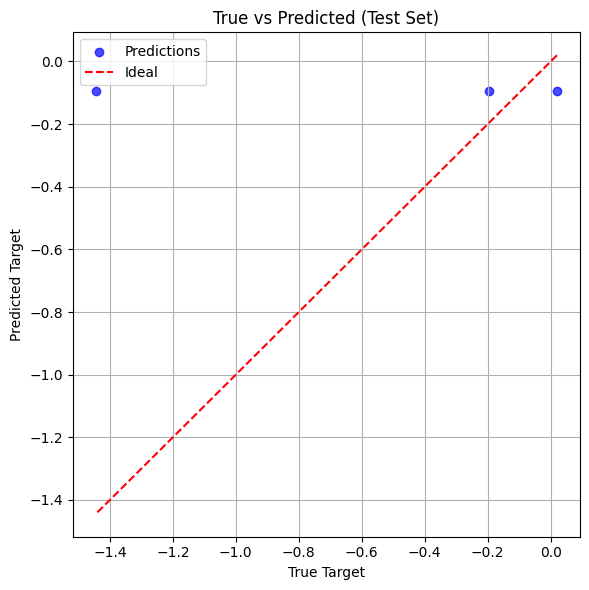

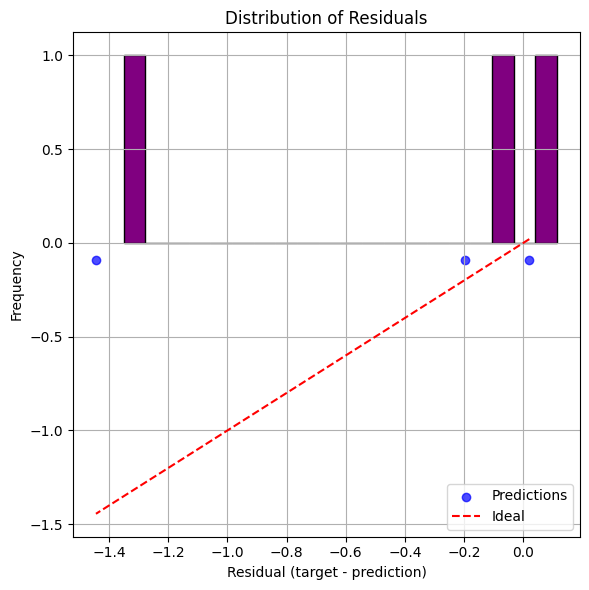

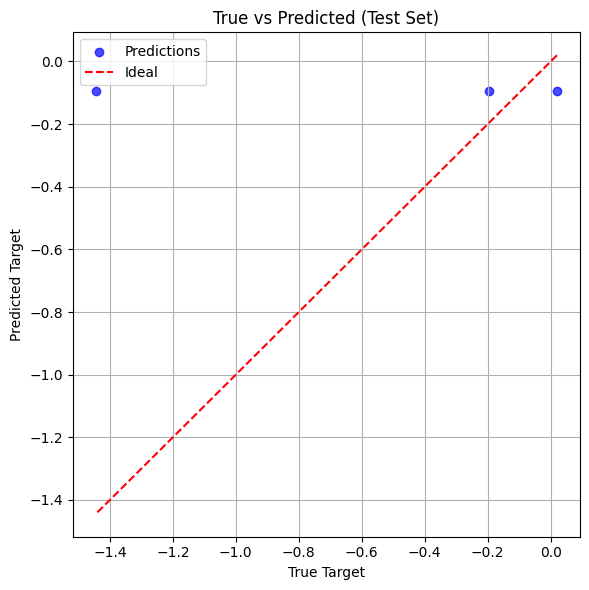

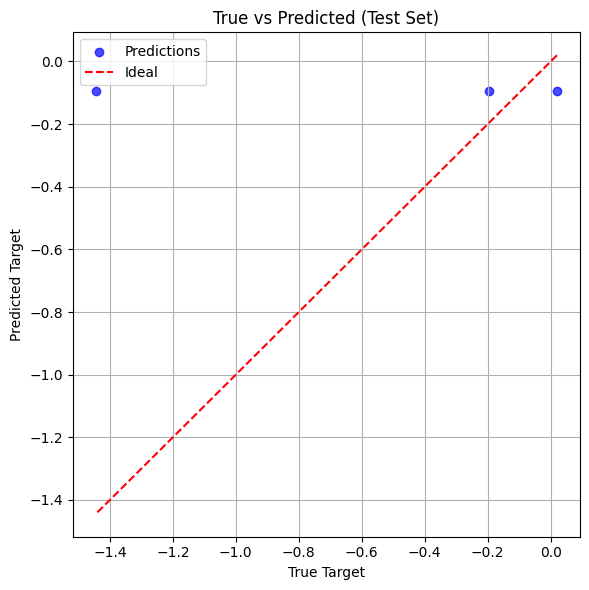

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TMDC_Results/prediction_results_test_set.csv")
plt.figure(figsize=(6,6))
plt.scatter(df["target"], df["prediction"], alpha=0.7, color="blue", label="Predictions")
plt.plot(df["target"], df["target"], "r--", label="Ideal")
plt.xlabel("True Target")
plt.ylabel("Predicted Target")
plt.title("True vs Predicted (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


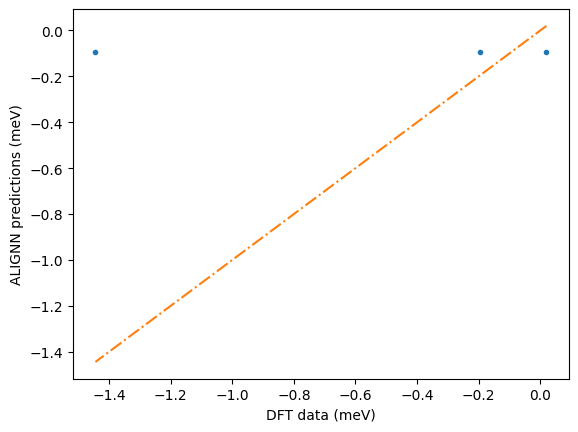

In [70]:
plt.plot(df['target'],df['prediction'],'.')
plt.plot(df['target'],df['target'],'-.')
plt.xlabel('DFT data (meV)')
plt.ylabel('ALIGNN predictions (meV)')
plt.show()

In [79]:
import os
os.listdir("TMDC_Results")


['co2_dataset_fixed.jsontrain_data_data_range',
 'prediction_results_train_set.csv',
 'ids_train_val_test.json',
 'config.json',
 'co2_dataset_fixed.jsonval_data_data_range',
 'co2_dataset_fixed.jsontest_data_data_range',
 'mad',
 'prediction_results_test_set.csv']

In [81]:
import pandas as pd
from jarvis.core.atoms import Atoms

# Load full dataset
data = pd.read_json("co2_dataset_fixed.json")

# Add formula using JARVIS atoms
cf_list = []
for i, row in data.iterrows():
    atoms = Atoms.from_dict(row["atoms"])
    cf_list.append(atoms.composition.reduced_formula)

# Add as new column
data["formula"] = cf_list

# View top entries with highest target values
data.sort_values("target", ascending=False).head(10)


,target,jid,atoms,formula
3,13.551816,MoS2_ribbon_Mo_edge_Sv.vasp,"{'lattice_mat': [[33.0, 0.0, 0.0], [0.0, 25.52...",Mo16S33
14,6.010615,WS2_ribbon_W_edge_Dv.vasp,"{'lattice_mat': [[33.0, 0.0, 0.0], [0.0, 25.22...",W24S49
9,1.686166,WS2_sheet_Sv.vasp,"{'lattice_mat': [[18.9192, 0.0, 1.2e-15], [-9....",W36S71
0,1.279388,MoS2_sheet_Sv.vasp,"{'lattice_mat': [[19.1418952942, 0.0, 0.0], [-...",Mo36S71
27,1.254724,WSe2_sheet_Sv.vasp,"{'lattice_mat': [[19.692, 0.0, 1.2e-15], [-9.8...",W36Se71
18,1.143370,MoSe2_sheet_Sv.vasp,"{'lattice_mat': [[19.734, 0.0, 1.2e-15], [-9.8...",Mo36Se71
32,0.966546,WSe2_ribbon_W_edge_Dv.vasp,"{'lattice_mat': [[33.0, 0.0, 0.0], [0.0, 26.25...",W24Se49
6,0.333258,MoS2_ribbon_S_edge_Dv.vasp,"{'lattice_mat': [[33.0, 0.0, 0.0], [0.0, 25.52...",Mo24S49
24,0.263179,MoSe2_ribbon_Se_edge_Dv.vasp,"{'lattice_mat': [[33.0, 0.0, 0.0], [0.0, 26.31...",Mo24Se49
4,0.106785,MoS2_ribbon_S_edge_Sv.vasp,"{'lattice_mat': [[33.0, 0.0, 0.0], [0.0, 25.52...",Mo16S33


In [83]:
import pandas as pd
from jarvis.core.atoms import Atoms

# Load full dataset
atoms_df = pd.read_json("co2_dataset_fixed.json")

# Extract formula from atoms field
atoms_df["formula"] = [Atoms.from_dict(row["atoms"]).composition.reduced_formula for _, row in atoms_df.iterrows()]

# Load predictions
pred_df = pd.read_csv("TMDC_Results/prediction_results_test_set.csv")

# Merge based on index
merged_df = pred_df.copy()
merged_df["formula"] = atoms_df.loc[merged_df.index, "formula"].values

# Show top predictions
merged_df.sort_values("prediction", ascending=False).head(10)


,id,target,prediction,formula
2,WSe2_ribbon_Se_edge_Tv.vasp,-1.444226,-0.093366,Mo12S23
0,WSe2_ribbon_Se_edge_Dv.vasp,0.019903,-0.093468,Mo36S71
1,WSe2_ribbon_W_edge_Tv.vasp,-0.197184,-0.093470,Mo18S35


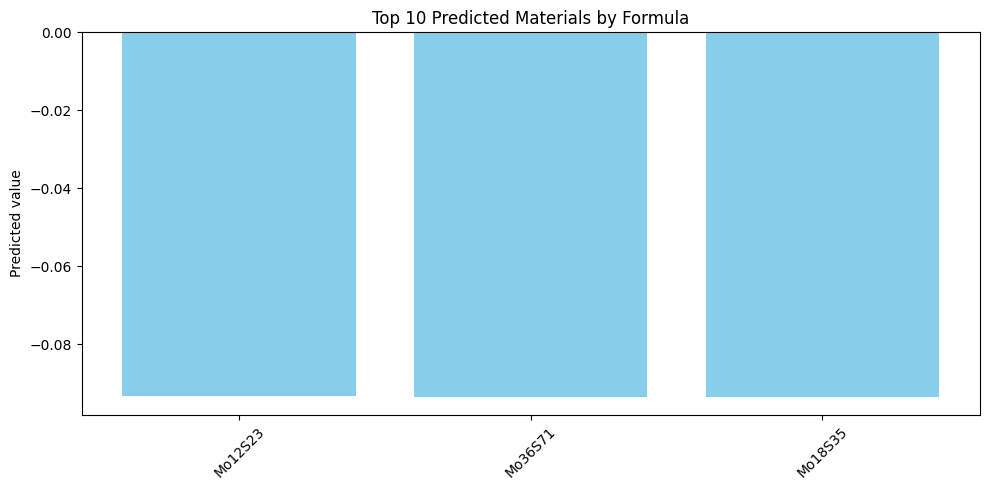

In [84]:
import matplotlib.pyplot as plt

# Sort by prediction
top = merged_df.sort_values("prediction", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(top["formula"], top["prediction"], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Predicted value")
plt.title("Top 10 Predicted Materials by Formula")
plt.tight_layout()
plt.show()
